## Fecha de Entrega: 10/11/2022

In [1]:
using LaTeXStrings
using OrdinaryDiffEq
using Plots
using Printf

In [2]:
include("../../../modules/module_choques_utils.jl")
include("../../../modules/module_crash_conservatives_methods.jl")

resolveEDO (generic function with 1 method)

# Tarea 4

### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia. Note que debe incluir (y por lo tanto tener en el mismo directorio) al archivo `choques_utils.jl`.

### Importante 2: ###

Renombre el archivo como: 
**nombre_grupo_tarea_5.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**El objetivo de la tarea es variado:**

1. Familiarizarse con el fenómeno de la formación de choques.
2. Familiarizarse con los métodos de captura de choques.
3. Transitar por el proceso de implementar un nuevo código.

**1)** En el directorio encontrará un notebook con distintos métodos de captura de choque. 
Uno de segundo orden *KT2* y otro de quinto orden, *MP5*. Ambos evolucionan tanto la ecuación de advección, ($u_t = c u_x$), como la de Burgers, $u_t = \frac{1}{2}(u^2)_x$. Lo hacen en un círculo (condiciones de borde periódicas) de longitud L.

Evolucione ambas (con el MP5):

In [3]:
# definimos parámetros de simulación
N=2000;x_range=(0.0,2π);t_end=2.0;All_saveat=false;
# resolvemos eq. de advección con MP5
sol_adv_01,x_adv_01,Δx_adv_01,Δt_adv_01=resolveEDO(:advection,:MonotonicityPreserving5,SSPRK33,N,x_range,t_end,All_saveat);
# resolvemos eq. de Burgers con MP5
sol_bur_01,x_bur_01,Δx_bur_01,Δt_bur_01=resolveEDO(:burgers,:MonotonicityPreserving5,SSPRK33,N,x_range,t_end,All_saveat);

Elegida la ecuación de Advección
Elegido el método MP5


Elegida la ecuación de Burgers
Elegido el método MP5


┌ Info: Saved animation to 
│   fn = /home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/AdvectionSineMP5.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/AdvectionSineMP5.gif")
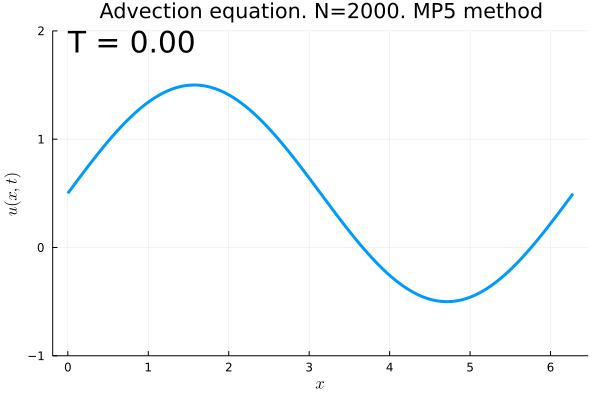

In [4]:
# ploteamos resultados eq. advección
anim = @animate for t in sol_adv_01.t
    plt = plot(x_adv_01, sol_adv_01(t), ylims = (-1.0,2.0),xlabel="\$x\$",ylabel="\$u(x,t)\$",title="Advection equation. N=$(N). MP5 method",label="",lw=3)
    annotate!(plt, 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "../plots/AdvectionSineMP5.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/BurgersSineMP5.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/BurgersSineMP5.gif")
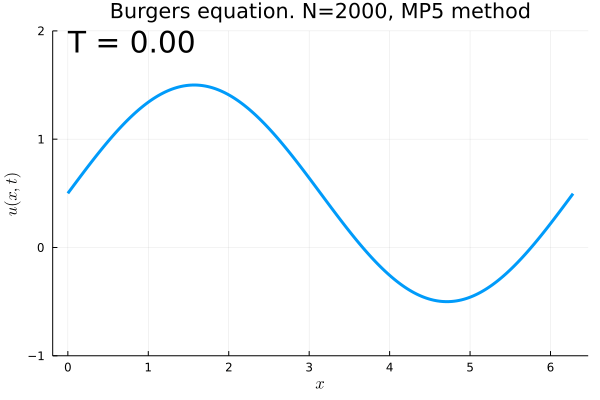

In [5]:
# ploteamos resultados eq. burgers
anim = @animate for t in sol_bur_01.t
    plt = plot(x_bur_01, sol_bur_01(t), ylims = (-1.0,2.0),xlabel="\$x\$",ylabel="\$u(x,t)\$",title="Burgers equation. N=$(N), MP5 method",label="",lw=3)
    annotate!(plt, 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "../plots/BurgersSineMP5.gif", fps = 30)

> 1. Para la primera verifique que la solución se mueve a velocidad constante.

Pegar código desarrollado en `Metodos_Conservativos_Julia.ipynb`

> 2. Para la segunda verifique que se forma un choque a un dado tiempo.
>> 1. Discuta como encontrar cúando se forma el choque y donde.

Para analizar el choque, debemos trabajar con la solución completa, por ello, debemos pedirle al paquete Differential Equations que nos guarde la solución para cada $\Delta t$. Esto es más costoso computacionalmente, pero se probó y si no se hacia de esta manera (guardando menos puntos) el resultado no era tan preciso.

In [6]:
N=2000;x_range=(0.0,2π);t_end=2.0;All_saveat=true;
sol_bur_02,x_bur_02,Δx_bur_02,Δt_bur_02=resolveEDO(:burgers,:MonotonicityPreserving5,SSPRK33,N,x_range,t_end,All_saveat);

Elegida la ecuación de Burgers
Elegido el método MP5


### Queremos encontrar el nodo de la solución

Para esto, realizamos una busqueda dentro del vector solución e identificamos la posición (y el correspondiente índice dentro del vector posición) donde la función cambia de signo. Esta posición nos permitirá identificar el momento del choque pues, el mismo no se moverá hasta que ocurra el choque y comenzará a desplazarse.

La busqueda se hace en el vector solución a tiempo inicial. Y se analiza el valor absoluto de la solución pues, en el siguiente gráfico podemos ver que que de esta manera se encontrarán todos las posiciones de la solución cercanos a cero, tanto a izquierda como a derecha.

┌ Info: Saved animation to 
│   fn = /home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/BurgersSineMP5_AbsValue.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/BurgersSineMP5_AbsValue.gif")
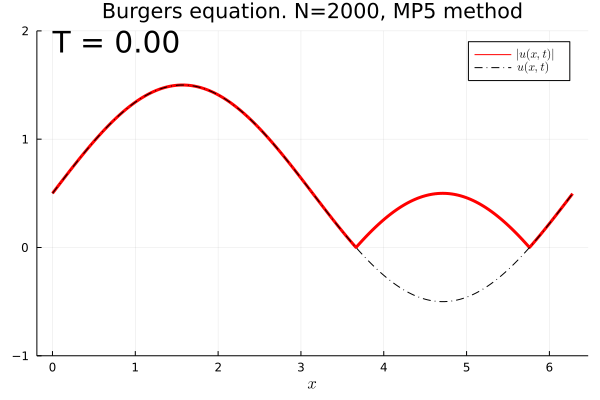

In [7]:
anim = @animate for t in sol_bur_01.t
    plt = plot(x_bur_01, abs.(sol_bur_01(t)), ylims = (-1.0,2.0),xlabel="\$x\$",ylabel="",title="Burgers equation. N=$(N), MP5 method",label="\$|u(x,t)|\$",lw=3,color="red")
    plt = plot!(x_bur_01, sol_bur_01(t), ylims = (-1.0,2.0),label="\$u(x,t)\$",lw=1,color="black",ls=:dashdot)
    annotate!(plt, 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "../plots/BurgersSineMP5_AbsValue.gif", fps = 30)

In [8]:
function FindNode(sol,xvector,Δx)

    # Searching for an element in a 1D ARRAY (array1)
    array1 = abs.(sol[:,1,1]); # vector solución a tiempo inicial
    # definimos valor para buscar dentro de array1
    ϵ = Δx; sch = 0.0 + 54*Δx;

    # creamos array sólo con elementos que cumplen con u(x,t) ≤ 54Δx ≈ 0
    elementArray = filter( x -> x <= sch, array1 )
    if (length(elementArray) == 0) # caso en que el arreglo filtrado no tenga elementos
        println("Element not found.")
    else # caso en que el arreglo filtrado tenga al menos un element
        # imprimimos el valor más cercano a cero
        u_x0=minimum(elementArray);
        println("Element found in the array.","\nu(x₀,t) = ",u_x0)
    end

    x0=0.0;x0_index=0 # POR QUE?!!!!!!
    for x_index in 1:length(xvector)
        if (abs(sol[x_index,1,1]) == u_x0)
            x0_index=x_index;x0=xvector[x0_index]
            println("x₀ = ",x0,"\nindex of x₀ = ",x0_index)
        end
    end

    return u_x0,x0,x0_index
end

FindNode (generic function with 1 method)

In [9]:
u_x0,x0,x0_index=FindNode(sol_bur_02,x_bur_02,Δx_bur_02);

Element found in the array.
u(x₀,t) = 0.0009066253607096231
x₀ = 3.6662386267392884
index of x₀ = 1168


Ahora calculamos la derivada de la solución respecto a la posición, es decir $\partial_x{u(x,t)}$, para ello, usamos el operador de diferencia finita de orden dos, PBC y obtenemos, para cada tiempo el vector diferencial correspondiente.

In [10]:
function D2_pbc(du,u,dx)
    @. du[2:end-1] = (u[3:end] - u[1:end-2])/(2*dx)
    du[1] = (u[2] - u[end])/(2*dx)
    du[end] = (u[1] - u[end-1])/(2*dx)
    return du
end

function x_diff_function(sol,x,Δx,Δt)
    
    dim_row=length(sol.t)
    dim_column=length(x)

    # creamos y seteamos valores de la matriz
    u_matrix = zeros(dim_row,dim_column)
    for (t_index,t_value) in enumerate(sol.t)
        # c/fila corresponde a u(x,t) para un t fijo y ∀x
        u_matrix[t_index,:] = sol(t_value)[:]
    end

    # creamos y seteamos valores de matriz
    x_diff_matrix = zeros(dim_row,dim_column)
    for t_index in 1:dim_row
        # c/fila corresponde a ∂ₓ[u(x,t)] para un t fijo y ∀x con PBC
        x_diff_matrix[t_index,:] = D2_pbc(x_diff_matrix[t_index,:],u_matrix[t_index,:],Δx)
    end

    return x_diff_matrix
end

x_diff_function (generic function with 1 method)

In [11]:
x_diff_02 = x_diff_function(sol_bur_02,x_bur_02,Δx_bur_02,Δt_bur_02);

Ahora buscamos, dentro de la matriz $\partial_x {u(x,t)}$ aquel valor de derivada más alto (teorícamente sería el valor para el cual diverge la derivada) siempre que el nodo de la solución no se mueva. Específicamente buscamos $\max |\partial_x {u(x,t)}|$. Esto nos permitirá encontrar la posición $x_s$ y el tiempo $t_s$ en el cual comienza el choque, entonces,

In [28]:
function FindDivergence(sol,x_diff,xvector,x0_index,sch)
    # buscamos max{|∂ₓ[u(x,t)]|}
    # seteamos tupla de resultados en cero
    max_xdiff=(0.0,0.0,0.0);    # (max{|∂ₓ[u(x,t)]|},tₛ,xₛ)
    max_index=(0.0,0.0);        # (t₀Index,x₀Index)

    for (t_index,t_value) in enumerate(sol.t) # hacemos una busqueda para cada tiempo
        # esto nos devuelve una tupla con el valor y el indice del maximo encontrado
        aux_max = findmax(abs.(x_diff[t_index,:]));
        # actualizamos valor del maximo e imponemos condicion de que el nodo no se desplace
        if (aux_max[1]≥max_xdiff[1]) && (sol[x0_index,1,t_index]≤sch)
            max_xdiff = (aux_max[1],t_value,xvector[aux_max[2]])
            max_index = (t_index,aux_max[2])
        end
    end

    # calculamos el invariante = area bajo la curva en el tiempo de choque
    secction_cte=0.5*max_xdiff[3]*(sol[max_index[2],1,max_index[1]]+sol[1,1,1]);
    # calculamos la vleocidad de propagación del choque
    crash_velocity=0.5*sol[max_index[2],1,max_index[1]];

    println("(max{|∂ₓ[u(x,t)]|},tₛ,xₛ)=",max_xdiff,"\n(t₀Index,x₀Index)=",max_index);
    println("constant section = ",secction_cte,"\ncrash velocity = ",crash_velocity);
    
    return max_xdiff,max_index,secction_cte,crash_velocity
end

FindDivergence (generic function with 1 method)

In [29]:
max_xdiff_02,max_index_02=FindDivergence(sol_bur_02,x_diff_02,x_bur_02,x0_index,54*Δx_bur_02);

(max{|∂ₓ[u(x,t)]|},tₛ,xₛ)=(

163.64606318678415, 1.0430087609918115, 3.6630970340856988)
(t₀Index,x₀Index)=(3321, 1167)
constant section = 1.7545871344651929
crash velocity = 0.2289900781056252


Y ahora graficamos los resultados, para entender un poco mejor ...

┌ Info: Saved animation to 
│   fn = /home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/xDiffBurgersSineMP5.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/xDiffBurgersSineMP5.gif")
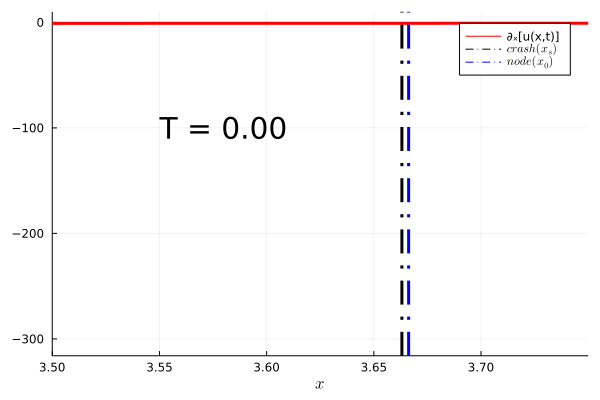

In [31]:
ymin=-316;ymax=10;
xmin=3.5;xmax=3.75;
anim = @animate for t_index in 1:10:length(sol_bur_02.t)
    plt=plot(x_bur_02,x_diff_02[t_index,:],xlims = (xmin,xmax),ylims = (ymin,ymax),xlabel="\$x\$",label="∂ₓ[u(x,t)]",color=:red,lw=3,linestyle=:solid)
    plt = plot!([max_xdiff_02[3]],seriestype= :vline,label="\$crash (x_s)\$",color=:black,lw=3,ls=:dashdot)
    plt = plot!([x0],seriestype= :vline,label="\$node (x_0)\$",color=:blue,lw=3,ls=:dashdot)
    annotate!(plt, 3.55, -100, text("T = $(@sprintf("%.2f",t_index*Δt_bur_02))", :black, :left, 20))
end

gif(anim, "../plots/xDiffBurgersSineMP5.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/BurgersSineMP5_AbsValue_xsts.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/BurgersSineMP5_AbsValue_xsts.gif")
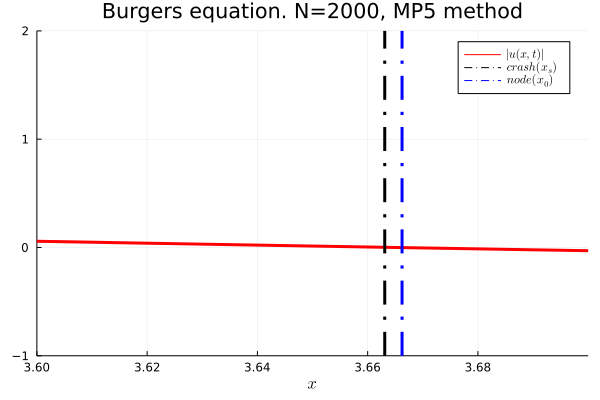

In [32]:
ymin=-1;ymax=2;
xmin=3.6;xmax=3.7;
anim = @animate for t in sol_bur_01.t
    plt = plot(x_bur_01, sol_bur_01(t),xlims = (xmin,xmax),ylims = (ymin,ymax),xlabel="\$x\$",ylabel="",title="Burgers equation. N=$(N), MP5 method",label="\$|u(x,t)|\$",lw=3,color="red")
    plt = plot!([max_xdiff_02[3]],seriestype= :vline,label="\$crash (x_s)\$",color=:black,lw=3,ls=:dashdot)
    plt = plot!([x0],seriestype= :vline,label="\$node (x_0)\$",color=:blue,lw=3,ls=:dashdot)
    annotate!(plt, 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "../plots/BurgersSineMP5_AbsValue_xsts.gif", fps = 20)

> 2. Vea que el tiempo de formación del choque coincide con el tiempo teórico calculado. 

> 3. Observe que el choque decae en el tiempo, encuentre experimentalmente cual es la ley de decaimiento.

In [16]:
N=2000;x_range=(0.0,2π);t_end=5.0;All_saveat=false;
sol_bur_03,x_bur_03,Δx_bur_03,Δt_bur_03=resolveEDO(:burgers,:MonotonicityPreserving5,SSPRK33,N,x_range,t_end,All_saveat);

Elegida la ecuación de Burgers
Elegido el método MP5


┌ Info: Saved animation to 
│   fn = /home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/BurgersSineMP5_LargeTend.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/mendez/github_repositories/my_repositories/pde2022/tareas/04_tarea/plots/BurgersSineMP5_LargeTend.gif")
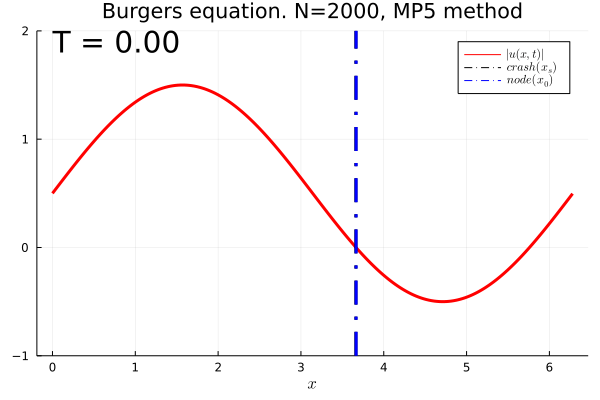

In [33]:
anim = @animate for t in sol_bur_03.t
    plt = plot(x_bur_03, sol_bur_03(t), ylims = (-1.0,2.0),xlabel="\$x\$",ylabel="",title="Burgers equation. N=$(N), MP5 method",label="\$|u(x,t)|\$",lw=3,color="red")
    plt = plot!([max_xdiff_02[3]],seriestype= :vline,label="\$crash (x_s)\$",color=:black,lw=3,ls=:dashdot)
    plt = plot!([x0],seriestype= :vline,label="\$node (x_0)\$",color=:blue,lw=3,ls=:dashdot)
    annotate!(plt, 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "../plots/BurgersSineMP5_LargeTend.gif", fps = 30)

In [18]:
N=2000;x_range=(0.0,2π);t_end=5.0;All_saveat=true;
sol_bur_04,x_bur_04,Δx_bur_04,Δt_bur_04=resolveEDO(:burgers,:MonotonicityPreserving5,SSPRK33,N,x_range,t_end,All_saveat);

Elegida la ecuación de Burgers
Elegido el método MP5


In [19]:
x_diff_04 = x_diff_function(sol_bur_04,x_bur_04,Δx_bur_04,Δt_bur_04);

In [36]:
max_xdiff_04,max_index_04,secction_cte_04,crash_velocity_04=FindDivergence(sol_bur_04,x_diff_04,x_bur_04,x0_index,54*Δx_bur_02);

(max{|∂ₓ[u(x,t)]|},tₛ,xₛ)=(163.64606318678415, 1.0430087609918115, 3.6630970340856988)
(t₀Index,x₀Index)=(3321, 1167)
constant section = 1.7545871344651929
crash velocity = 0.2289900781056252


In [21]:
# ### REHACER GRAFICO
# anim = @animate for t in sol_bur.t
#     plt = plot(x_bur, sol_bur(t)[:,1].-sol_bur[max_index[2],1,max_index[1]], ylims = (-1.0,2.0))
#     annotate!(plt, 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
# end
# gif(anim, "../plots/BurgersSineMP5_LargeTend.gif", fps = 40)

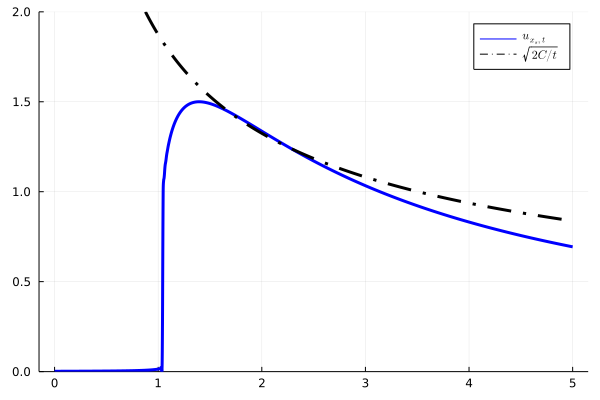

In [37]:
ymin=0;ymax=2;
plt=plot(sol_bur_04.t,sol_bur_04[max_index_04[2],1,:],ylims = (ymin,ymax),label="\$u_{x_{s},t}\$",color=:blue,lw=3,linestyle=:solid)
plt=plot!(sol_bur_04.t,sqrt(2.0*secction_cte_04)./.√(sol_bur_04.t),ylims = (ymin,ymax),label="\$\\sqrt{2C/t}\$",color=:black,lw=3,linestyle=:dashdot)
display(plt)

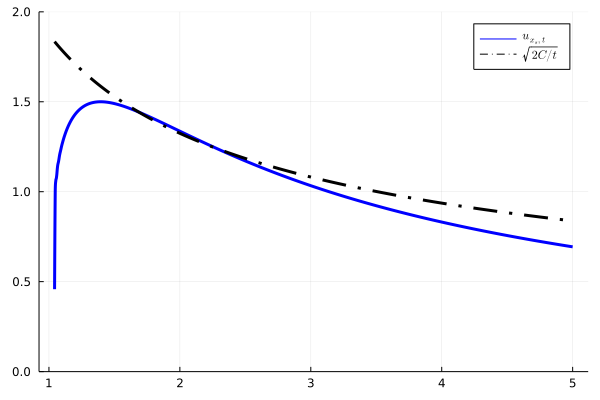

In [38]:
ymin=0;ymax=2;
plt=plot(sol_bur_04.t[max_index_04[1]:end],sol_bur_04[max_index_04[2],1,max_index_04[1]:end],ylims = (ymin,ymax),label="\$u_{x_{s},t}\$",color=:blue,lw=3,linestyle=:solid)
plt=plot!(sol_bur_04.t[max_index_04[1]:end],sqrt(2.0*secction_cte_04)./.√(sol_bur_04.t[max_index_04[1]:end]),ylims = (ymin,ymax),label="\$\\sqrt{2C/t}\$",color=:black,lw=3,linestyle=:dashdot)
display(plt)

**2)** Evolucione la ecuación de advección con ambos códigos: 

> 1. Compare los resultados y describa que sucede. Compare con distintos valores de $\theta$

In [24]:
N=2000;x_range=(0.0,2π);t_end=5.0;All_saveat=false;
sol_adv_MP5,x_adv_MP5,Δx_adv_MP5,Δt_adv_MP5=resolveEDO(:advection,:MonotonicityPreserving5,SSPRK33,N,x_range,t_end,All_saveat);

Elegida la ecuación de Advección
Elegido el método MP5


In [25]:
sol_adv_KTθ1,x_adv_KTθ1,Δx_adv_KTθ1,Δt_adv_KTθ1=resolveEDO(:advection,:KurganovTadmor,SSPRK33,N,x_range,t_end,All_saveat;θ=1.0);
sol_adv_KTθ2,x_adv_KTθ2,Δx_adv_KTθ2,Δt_adv_KTθ2=resolveEDO(:advection,:KurganovTadmor,SSPRK33,N,x_range,t_end,All_saveat;θ=1.5);
sol_adv_KTθ3,x_adv_KTθ3,Δx_adv_KTθ3,Δt_adv_KTθ3=resolveEDO(:advection,:KurganovTadmor,SSPRK33,N,x_range,t_end,All_saveat;θ=3.0);

Elegida la ecuación de Advección
Elegido el método KT


Elegida la ecuación de Advección
Elegido el método KT


Elegida la ecuación de Advección
Elegido el método KT


In [26]:
# using Pkg
# Pkg.add("PlotThemes")

┌ Info: Saved animation to 
│   fn = /tmp/jl_2PYbUVUFAt.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/tmp/jl_2PYbUVUFAt.gif")
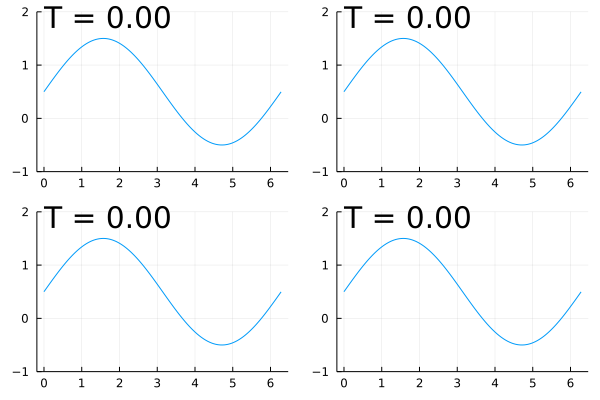

In [27]:
@gif for t ∈ sol_adv_KTθ3.t
    fig = plot(layout = grid(2,2), legend=false)

    plot!(fig[1],x_adv_MP5, sol_adv_MP5(t), ylims = (-1.0,2.0))
    annotate!(fig[1], 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))

    plot!(fig[2],x_adv_KTθ1, sol_adv_KTθ1(t), ylims = (-1.0,2.0))
    annotate!(fig[2], 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))

    plot!(fig[3],x_adv_KTθ2, sol_adv_KTθ2(t), ylims = (-1.0,2.0))
    annotate!(fig[3], 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))

    plot!(fig[4],x_adv_KTθ3, sol_adv_KTθ3(t), ylims = (-1.0,2.0))
    annotate!(fig[4], 0.0, 1.9, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end

> 2. Compare con lo que obtendría usando un método usual de diferencias finitas de 4to orden.

> Repita el primer punto con la ecuación de Burgers.

**3)** Elija un sistema en D=1 que sea de tipo conservativo e implemente un código para evolucionarlo. 
Estos dos sistemas que siguen se dan como ejemplos, pero ustedes pueden elegir cualquier otro. 
Es mejor si tienen conocimiento del comportamiento del sistema que elijan.

1. Euler: las variables son la densidad $\rho$ y el momento $p^x$, $U=(\rho, p^x)$.

\begin{align*}
    \dot{\rho} &=& -\partial_x(p^x) \\
    \dot{p^x} &=& -\partial_x(\frac{p^x p^x}{\rho} + p_0 \rho^{\gamma})
\end{align*}

(*) aquí p_0 es la presión y es una constante

Con un valor recomendado de $\gamma = 1.3$. Debe tomar un dato inicial donde $\rho$ sea positiva y no cercana a cero. La velocidad de propagación del fluido es: $c^2 = \frac{dp}{d\rho} = \gamma p/\rho = \gamma p_0 \rho^{\gamma-1}$
    
2. Force-Free: las variables son el campo magnético (componente y) y el vector de Poyting (componentes x e y), $U = (S^x, S^y, B^y)$
\begin{align*}
    \dot{S^x} &=& -\partial_x(T^{xx}) = \partial_x(-e + B_x^2) \\
    \dot{S^y} &=& -\partial_x(T^{xy}) = \partial_x(B_xB_y) \\
    \dot{B^y} &=& \partial_x(v^x B^y + v^y B^x) 
\end{align*}

(*) Aquí T es el tensor energía-momento, S es el vector de Poyting y B es el campo magnético

Donde, $e = \frac{1}{2}(E_z^2 + B_x^2 + B_y^2) = \frac{1}{2}(\frac{S_x^2+S_y^2}{B_x^2+B_y^2}+B_x^2+B_y^2)$ y $v^i = \frac{S^i}{B^2}$. Para esta ecuación $B^x$ es una constante *distinta de cero*. Además $S^i$ tiene que ser perpendicular $\sum_i S^i B^i = 0$ con $\sum_i (v^i) < 1$. Con i ={x,y}

https://en.wikipedia.org/wiki/Shallow_water_equations